# Stage2 機械学習Report 
##### (線形回帰モデル/非線形回帰モデル/ロジスティック回帰モデル/主成分分析/アルゴリズム/サポートベクターマシーン)

## 回帰問題
### 入力（離散または連続値）から出力を予測する問題
#### 　線形で予測　------> 　線形回帰モデル
#### 非線形で予測　------> 非線形回帰モデル
#### 
#### 回帰で扱うデータ
##### 入力(説明変数または特徴量）

#### &emsp;&emsp; $ x= (x_1 , x_2 , \cdots ,x_m )^ \mathrm{T} \in  \mathbb{R}^m  $ 

#### 出力(目的値）

#### &emsp;&emsp; $ y \in \mathbb{R}^1  $ 

## 1.線形回帰モデル

#### 教師あり学習
#### 入力とm次元パラメータの線形結合を出力するモデル

##### パラメータ　$ \boldsymbol{w} = (w_1,w_2, \cdots , w_m )^ \mathrm{T} )\in  \mathbb{R}^m $

##### 線形結合　$ \hat{y} = w^ \mathrm{T} x + w_0 =\sum _{j=1} ^{m} {w_jx_j} + w_0 $

#### 線形結合とは、入力とパラメータの内積である。
###### $w $ パラメータ--->　重み(weight ), 切片(バイアス)を加えたもの。
###### 重みは正の値をつけると、特徴量を増加させる。負の値をつけると現象させる。
###### 大きい値だと影響力を増すことになる。
###### 入力ベクトルが多次元でも出力は一次元（スカラ）になる。

## 線形回帰モデル　ハンズオン

In [23]:
#from モジュール名 import クラス名（もしくは関数名や変数名）
from sklearn.datasets import load_boston
from pandas import DataFrame
import numpy as np
# ボストンデータを"boston"というインスタンスにインポート
boston = load_boston()
#インポートしたデータを確認(data / target / feature_names / DESCR)
print(boston)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [3]:
#DESCR変数の中身を確認
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
#feature_names変数の中身を確認
#カラム名
print(boston['feature_names'])

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [8]:
#data変数(説明変数)の中身を確認
print(boston['data'])

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [9]:
#target変数(目的変数)の中身を確認
print(boston['target'])

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

### 2. データフレームの作成

In [13]:
#　説明変数らをDataFrameへ変換
df = DataFrame(data=boston.data, columns = boston.feature_names)
# 目的変数をDataFrameへ追加
df['PRICE'] = np.array(boston.target)
# 最初の5行を表示
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### 線形単回帰分析

In [15]:
#カラムを指定してデータを表示
df[['RM']].head()
# 説明変数
data = df.loc[:, ['RM']].values
#dataリストの表示(1-5)
data[0:5]

array([[6.575],
       [6.421],
       [7.185],
       [6.998],
       [7.147]])

In [16]:
# 目的変数
target = df.loc[:, 'PRICE'].values
target[0:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

In [21]:
## sklearnモジュールからLinearRegressionをインポート
from sklearn.linear_model import LinearRegression
# オブジェクト生成
model = LinearRegression()
#model.get_params()
#model = LinearRegression(fit_intercept = True, normalize = False, copy_X = True,  n_jobs = 1)
# fit関数でパラメータ推定
model.fit(data, target)

LinearRegression()

In [22]:
#予測
model.predict([[1]])

array([-25.5685118])

### 重回帰分析(2変数)

In [24]:
#カラムを指定してデータを表示
df[['CRIM', 'RM']].head()

,CRIM,RM
0,0.00632,6.575
1,0.02731,6.421
2,0.02729,7.185
3,0.03237,6.998
4,0.06905,7.147


In [28]:
# 説明変数
data2 = df.loc[:, ['CRIM', 'RM']].values
# 目的変数
target2 = df.loc[:, 'PRICE'].values
#オブジェクト生成
model2 = LinearRegression()
# fit関数でパラメータ推定
model2.fit(data2, target2)
model2.predict([[0.2, 7]])

array([29.43977562])

### 回帰係数と切片の値を確認

In [29]:
# 単回帰の回帰係数と切片を出力
print('推定された回帰係数: %.3f, 推定された切片 : %.3f' % (model.coef_, model.intercept_))

推定された回帰係数: 9.102, 推定された切片 : -34.671


In [30]:
# 重回帰の回帰係数と切片を出力
print(model.coef_)
print(model.intercept_)

[9.10210898]
-34.67062077643857


### モデルの検証
#### 1. 決定係数
#### 決定係数
#### print('単回帰決定係数: %.3f, 重回帰決定係数 : %.3f' % (model.score(data,target), model2.score(data2,target2)))

In [31]:
#### 決定係数
print('単回帰決定係数: %.3f, 重回帰決定係数 : %.3f' % (model.score(data,target), model2.score(data2,target2)))

単回帰決定係数: 0.484, 重回帰決定係数 : 0.542


In [32]:
# train_test_splitをインポート
from sklearn.model_selection import train_test_split

In [33]:
# 70%を学習用、30%を検証用データにするよう分割
X_train, X_test, y_train, y_test = train_test_split(data, target, 
test_size = 0.3, random_state = 666)
# 学習用データでパラメータ推定
model.fit(X_train, y_train)
# 作成したモデルから予測（学習用、検証用モデル使用）
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

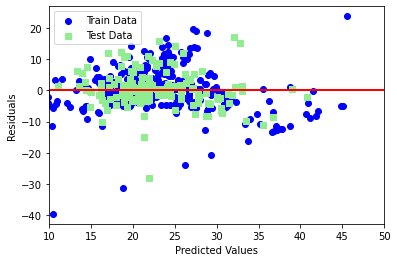

In [34]:
# matplotlibをインポート
import matplotlib.pyplot as plt
# Jupyterを利用していたら、以下のおまじないを書くとnotebook上に図が表示
%matplotlib inline
# 学習用、検証用それぞれで残差をプロット
plt.scatter(y_train_pred, y_train_pred - y_train, c = 'blue', marker = 'o', label = 'Train Data')
plt.scatter(y_test_pred, y_test_pred - y_test, c = 'lightgreen', marker = 's', label = 'Test Data')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
# 凡例を左上に表示
plt.legend(loc = 'upper left')
# y = 0に直線を引く
plt.hlines(y = 0, xmin = -10, xmax = 50, lw = 2, color = 'red')
plt.xlim([10, 50])
plt.show()

## 2,非線形回帰モデル
## 3.ロジスティック回帰モデル
## 4.主成分分析
## 5.アルゴリズム
## 6.サポートベクターマシーン
### 1.1.1行列とは？
#### &emsp;&emsp;スカラ―を表にしたもの。
#### &emsp;&emsp;ベクトルを並べたもの
#### &emsp;&emsp;&emsp;&emsp;→何に使うのか？
#### &emsp;&emsp;&emsp;&emsp;&emsp;1.ベクトルの変換
#### &emsp;&emsp;&emsp;&emsp;&emsp;2.連立方程式を解く
##### &emsp;&emsp; 以下の連立方程式

$$
        \begin{cases}
             &x_1  &+ &2x_2 &= 3 　\\
             &2x_1 &+ &5x_2 &= 5 　\\ 
        \end{cases}
$$

##### &emsp;&emsp; 行列式で表すと以下の式になる。

$$
A\vec{x} = \vec{b}
$$
$$
\left(
    \begin{matrix} 
1 & 2 \\ 2 & 5 
\end{matrix} 
\right)
\left(
    \begin{matrix} 
x_1 \\ x_2 
\end{matrix} 
    \right)  
=
    \left(
    \begin{matrix} 
3 \\ 5 
\end{matrix} 
    \right)  
$$

##### 1.1.2 行列とベクトルの積

$$
\left(
    \begin{matrix} 
6& 4\\ 3& 5 
\end{matrix} 
\right)
\left(
    \begin{matrix} 
1 \\ 2 
\end{matrix} 
    \right)  
=
    \left(
    \begin{matrix} 
6*1+4*2 \\ 3*1+5*2 
\end{matrix} 
    \right)  
=
    \left(
    \begin{matrix} 
14 \\ 13 
\end{matrix} 
    \right)  
$$

行列の積は、先の行列の"行"と後の行列の"列”の積を和したものになる。

例：

$$
\begin{matrix}
\left[
\begin{array}{ccc}
a_{11} & a_{12} & a_{13} \\
a_{21} & a_{22} & a_{23} \\
a_{31} & a_{32} & a_{33} \\
\end{array}
\right]
\end{matrix}
\begin{matrix}
\left[
\begin{array}{ccc}
b_{11} & b_{12} & b_{13} \\
b_{21} & b_{22} & b_{23} \\
b_{31} & b_{32} & b_{33} \\
\end{array}
\right]
\end{matrix}
=
\begin{matrix}
\left[
\begin{array}{ccc}
a_{11}*b_{11}+a_{12}*b_{21}+ a_{13}*b_{31}& \cdots &  \cdots \\
 \cdots & a_{21}*b_{12}+a_{22}*b_{22}+ a_{23}*b_{32} & \cdots \\
 \cdots & \cdots &a_{31}*b_{13}+a_{32}*b_{23}+ a_{33}*b_{33} \\
\end{array}
\right]
\end{matrix}
$$

##### 1.1.3 行基本変換
　　行列式で連立方程式を解く場合、**行列基本変形**を行い左辺の行列を単位行列に変換する。その場合右辺が方程式の解となる。

###### &nbsp;&nbsp;&nbsp;&nbsp;**行基本変形の方法：**
&nbsp;&nbsp;&nbsp;&nbsp;①.K列をC倍  
&nbsp;&nbsp;&nbsp;&nbsp;②.S行目にt行目のC倍を加える  
&nbsp;&nbsp;&nbsp;&nbsp;③.P行目とq行目を入れ替え  

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;行基本変形の例：  

$$
\left(
    \begin{matrix} 
1 & 4 \\ 2 & 6 
\end{matrix} 
\right)
\left(
    \begin{matrix} 
x_1 \\ x_2 
\end{matrix} 
    \right)  
=
    \left(
    \begin{matrix} 
7 \\ 10 
\end{matrix} 
    \right)  
$$
$$
\downarrow
$$
$$
\left(
    \begin{matrix} 
1 & 4 \\ 1 & 3 
\end{matrix} 
\right)
\left(
    \begin{matrix} 
x_1 \\ x_2 
\end{matrix} 
    \right)  
=
    \left(
    \begin{matrix} 
7 \\ 5 
\end{matrix} 
    \right)  
$$
$$
\downarrow
$$
$$
\left(
    \begin{matrix} 
0 & 1 \\ 1 & 3 
\end{matrix} 
\right)
\left(
    \begin{matrix} 
x_1 \\ x_2 
\end{matrix} 
    \right)  
=
    \left(
    \begin{matrix} 
2 \\ 5 
\end{matrix} 
    \right)  
$$
$$
\downarrow
$$
$$
\left(
    \begin{matrix} 
0 & 1 \\ 1 & 0 
\end{matrix} 
\right)
\left(
    \begin{matrix} 
x_1 \\ x_2 
\end{matrix} 
    \right)  
=
    \left(
    \begin{matrix} 
2 \\ -1 
\end{matrix} 
    \right)  
$$
$$
\downarrow
$$
$$
\left(
    \begin{matrix} 
1 & 0 \\ 0 & 1 
\end{matrix} 
\right)
\left(
    \begin{matrix} 
x_1 \\ x_2 
\end{matrix} 
    \right)  
=
    \left(
    \begin{matrix} 
-1 \\ 2 
\end{matrix} 
    \right)  
$$

###### 左辺の行列が**単位行列**になると完了。

##### 1.1.4 行列の逆数

$$
\left(
    \begin{matrix} 
1 & 4 \\ 2 & 6 
\end{matrix} 
\right)
\left(
    \begin{matrix} 
x_1 \\ x_2 
\end{matrix} 
    \right)  
=
    \left(
    \begin{matrix} 
7 \\ 10 
\end{matrix} 
    \right)  
$$

行列の変換を一つの列で表すと

$$
\left(
    \begin{matrix} 
1 & 0 \\ 0 & 1 
\end{matrix} 
\right)
\left(
    \begin{matrix} 
1 & 0 \\ -3 & 1 
\end{matrix} 
\right)
\left(
    \begin{matrix} 
1 & -1 \\ 0 & 1 
\end{matrix} 
\right)
\left(
    \begin{matrix} 
1 & 0 \\ 0 & 1/2 
\end{matrix} 
\right)
\left(
    \begin{matrix} 
1 & 4 \\ 2 & 6 
\end{matrix} 
\right)
\left(
    \begin{matrix} 
x_1 \\ x_2 
\end{matrix} 
    \right)  
=
\left(
    \begin{matrix} 
0 & 1 \\ 1 & 0 
\end{matrix} 
\right)
\left(
    \begin{matrix} 
1 & 0 \\ -3 & 1 
\end{matrix} 
\right)
\left(
    \begin{matrix} 
1 & -1 \\ 0 & 1 
\end{matrix} 
\right)
\left(
    \begin{matrix} 
1 & 0 \\ 0 & \frac{1}{2} 
\end{matrix} 
\right)
    \left(
    \begin{matrix} 
7 \\ 10 
\end{matrix} 
    \right)  
$$
$$
\left(
    \begin{matrix} 
-3 & 2 \\ 1 & -1/2  
\end{matrix} 
\right)
\left(
    \begin{matrix} 
1 & 4 \\ 2 & 6 
\end{matrix} 
\right)
\left(
    \begin{matrix} 
x_1 \\ x_2 
\end{matrix} 
    \right)  
=
\left(
    \begin{matrix} 
-3 & 2 \\ 1 & - \frac{1}{2} 
\end{matrix} 
\right)
\left(
    \begin{matrix} 
7 \\ 10 
\end{matrix} 
    \right)  
$$

#### 1.1.5 単位行列

###### &emsp;&emsp;&emsp;行列式と掛けても(積しても）行列式の値が変化しない行列

$$
\left(
    \begin{matrix} 
1 & 0 \\ 0 & 1 
\end{matrix} 
\right)
\left(
    \begin{matrix}  
2 & 3 \\ 1 & 9 
\end{matrix} 
\right)
=
\left(
    \begin{matrix}  
2 & 3 \\ 1 & 9 
\end{matrix} 
\right)
,
\left(
    \begin{matrix} 
2 & 3 \\ 1 & 9 
\end{matrix} 
\right)
\left(
    \begin{matrix}  
1 & 0 \\ 0 & 1 
\end{matrix} 
\right)
=
\left(
    \begin{matrix}  
2 & 3 \\ 1 & 9 
\end{matrix} 
\right)
$$

$$  
　A・A^{-1}　= A^{-1}・A = I
$$  

#### 1.1.6　逆行列の作り方

###### &emsp;&emsp;&emsp;　以下の行列をガウスの掃き出し法（行基本変形)使って逆行列を求める。

$$
\left(
    \begin{matrix} 
1 & 4 \\ 2 & 6 
\end{matrix} 
\right)
\left(
    \begin{matrix} 
x_1 \\ x_2 
\end{matrix} 
    \right)  
=
    \left(
    \begin{matrix} 
7 \\ 10 
\end{matrix} 
    \right)  
$$
$$
\left(
    \begin{matrix} 
1 & 4 \\ 2 & 6 
\end{matrix} 
\right)
\left(
    \begin{matrix} 
x_1 \\ x_2 
\end{matrix} 
    \right)  
=
\left(
    \begin{matrix} 
1 & 0 \\ 0 & 1 
\end{matrix} 
\right)
    \left(
    \begin{matrix} 
7 \\ 10 
\end{matrix} 
    \right)  
$$

###### &emsp;&emsp;&emsp;&emsp;手順：

$$
\left(
    \begin{array}{cc|cc} 
1 & 4 & 1& 0 \\ 2 & 6 & 0 & 1 
\end{array} 
\right)
$$
$$
\downarrow
$$
$$
\left(
    \begin{array}{cc|cc} 
1 & 4 & 1& 0 \\ 1 & 3 & 0 & \frac{1}{2} 
\end{array} 
\right)
$$
$$
\downarrow
$$
$$
\left(
    \begin{array}{cc|cc} 
0 & 1 & 1 & -\frac{1}{2}  \\ 1 & 3 & 0 & \frac{1}{2} 
\end{array} 
\right)
$$
$$
\downarrow
$$
$$
\left(
    \begin{array}{cc|cc} 
0 & 1 & 1 & -\frac{1}{2}  \\ 1 & 0 & -3 & 2 
\end{array} 
\right)
$$
$$
\downarrow
$$
$$
\left(
    \begin{array}{cc|cc} 
1 & 0 & -3 & 2 \\ 0 & 1 & 1 & -\frac{1}{2} 
\end{array} 
\right)
$$

#### 1.1.7　逆行列が存在しないケース

&emsp;&emsp;&emsp;&emsp; 平行になって交わらない

$$  
x_1 + 4x_2 = 7 \\
x_1 + 4x_2 = 7
$$  

&emsp;&emsp;&emsp;&emsp;解が定まらない

$$  
x_1 + 4x_2 = 7 \\
2x_1 + 8x_2 = 14
$$ 

&emsp;&emsp;&emsp;&emsp;形式的には、

$$
\left(
    \begin{matrix} 
a & b \\ c & d 
\end{matrix} 
\right)
$$
$  a:b \neq c:d $ 逆行列の解を持つ $\\  $  $  a:b = c:d $ 逆行列の解を持たない

#### 1.1.8　逆行列の判別


$$
\left(
    \begin{matrix} 
a & b \\ c & d 
\end{matrix} 
\right)
 =
\left(
    \begin{matrix} 
    \vec{v_1} \\ \vec{v_2} 
\end{matrix} 
\right)
$$

##### rule1 .同じものを含むと0になる

$$ 
\begin{vmatrix}
\vec{v_1} \\ \vec{v_2} \\ \vec{v_3}
\end{vmatrix}
 = 0
$$

##### rule 2 .１つのベクトルがλ倍されると行列式はλ倍される

$$ 
\begin{vmatrix}
\vec{v_1} \\ \vec{v_2} \\ \vec{v_3}
\end{vmatrix}
 = 
\lambda
\begin{vmatrix}
\vec{v_1} \\ \vec{v_2} \\ \vec{v_3}
\end{vmatrix}
$$

##### rule 3.１つのベクトルがλ倍されると行列式はλ倍される

$$ 
\begin{vmatrix}
\vec{v_1} \\ \vec{v_2} + \vec{w}  \\ \vec{v_3}
\end{vmatrix}
 = 
\begin{vmatrix}
\vec{v_1} \\ \vec{v_2} \\ \vec{v_3}
\end{vmatrix}
+ 
\begin{vmatrix}
\vec{v_1} \\ \vec{w} \\ \vec{v_3}
\end{vmatrix}
$$

##### rule 4.行を入れ替えると符号が変わる

$$ 
\begin{vmatrix}
\vec{v_1} \\ \vec{v_2} \\  \vec{v_3}  \\ \vec{v_4}
\end{vmatrix}
 = -
\begin{vmatrix}
\vec{v_1} \\ \vec{v_3} \\ \vec{v_2} \\ \vec{v_4}
\end{vmatrix}
$$

##### rule 5. 3x3の行列式の和を2x2の行列式の和に変換

$$ 
\begin{vmatrix}
\vec{v_1} \\ \vec{v_2} \\  \vec{v_3} 
\end{vmatrix}
= 
\begin{vmatrix}
a & b & c \\ d & e & f \\ g & h & i
\end{vmatrix}
$$

$$
=
\begin{vmatrix}
a & b & c \\ 0 & e & f \\ 0 & h & i
\end{vmatrix}
+
\begin{vmatrix}
0 & b & c \\ d & e & f \\ 0 & h & i
\end{vmatrix}
+
\begin{vmatrix}
0 & b & c \\ 0 & e & f \\ g & h & i
\end{vmatrix}
$$

$$
=
a
\begin{vmatrix}
 e & f \\  h & i
\end{vmatrix}
- d 
\begin{vmatrix}
b & c \\ h & i
\end{vmatrix}
+ g 
\begin{vmatrix}
b & c \\ e & f 
\end{vmatrix}
$$

#### 1.1.9 固有値と固有ベクトル

##### A $\vec{x} $ = λ$\vec{x} $ 

##### 行列Aとその特殊なベクトル $\vec{x} $の積はただのスカラ―の数λとその特殊なベクトルと同じ値になる。
##### この場合、を固有ベクトルと呼び、$ \lambda $ を固有値という。

$$
\left(
    \begin{matrix} 
1 & 2 \\ 3 & 4
\end{matrix} 
\right)
\left(
    \begin{matrix} 
1 \\ 1 
\end{matrix} 
\right)
 =
\left(
    \begin{matrix} 
    5 \\ 5 
\end{matrix} 
\right)
$$

##### 固有値 $\lambda$ = 5 , 固有ベクトル
$$
\vec{x}= 
\left(
    \begin{matrix} 
    1 \\ 1 
\end{matrix} 
\right)
$$

##### 固有値と固有ベクトルの求め方

 $  A \vec{x} = \lambda \vec{x} $

$ ( A - \lambda　I)   \vec{x} =\vec{0} $

#####  I:単位行列 

##### 固有値と固有ベクトルの求め方$ \\  $  A $\vec{x}  = \lambda \vec{x} $

$( A - \lambda I)  \vec{x}  = \vec{0} $ 

$$ 
\begin{vmatrix}
A - \lambda I
\end{vmatrix}
 = 0
$$

$$ 
\begin{vmatrix}
1 - \lambda I & 4 \\ 2 & 3- \lambda
\end{vmatrix}
 = 0
$$

$$
\left(
    \begin{matrix} 
1 & 4 \\ 2 & 3
\end{matrix} 
\right)
\left(
    \begin{matrix} 
x_1 \\ x_2  
\end{matrix} 
\right)
 = 5 
\left(
    \begin{matrix} 
   x_1 \\ x_2
\end{matrix} 
\right)
$$
$$
\downarrow
$$
$$
\left(
    \begin{matrix} 
 x_1 + 4 x_2 \\ 2x1 + 3x_2
\end{matrix} 
\right)
 = 5 
\left(
    \begin{matrix} 
   x_1 \\ x_2
\end{matrix} 
\right)
$$
$$
\downarrow
$$
$$
\left(
    \begin{matrix} 
 x_1 + 4 x_2 \\ 2x1 + 3x_2
\end{matrix} 
\right)
 = 5 
\left(
    \begin{matrix} 
   x_1 \\ x_2
\end{matrix} 
\right)
$$
$$
\downarrow
$$
$$
\left(
    \begin{matrix} 
 1 & 4 \\ 2 & 3
\end{matrix} 
\right) 
\left(
    \begin{matrix} 
   x_1 \\ x_2
\end{matrix} 
\right)
= -1 
\left(
    \begin{matrix} 
   x_1 \\ x_2
\end{matrix} 
\right)
$$

比率までしか、わからない。

固有値が先に求まる。

3 x 3の行列式の固有値、固有ベクトルの求め方
$$
\left(
    \begin{matrix} 
3 & 2 & 0 \\ 0 & 2 & 0 \\ 0 & 0 & 1
\end{matrix} 
\right)
$$

$$
\begin{vmatrix}
3 - \lambda & 2 & 0 \\ 0 & 2 - \lambda & 0 \\ 0 & 0 & 1 - \lambda 
\end{vmatrix}
= 0
$$

(3 - λ) (2  - λ)(1 - λ) = 0

固有値(λ）は　３，２，１

$$
\left(
    \begin{matrix} 
3 & 2 & 0 \\ 0 & 2 & 0 \\ 0 & 0 & 1
\end{matrix} 
\right)
\left(
    \begin{matrix} 
x_1 \\ x_2 \\ x_3
\end{matrix} 
\right)
 = 
3
\left(
    \begin{matrix} 
x_1 \\ x_2 \\ x_3
\end{matrix} 
\right)
  \begin{align}
    &\begin{split} 
  3x_1 + 2x_2 = 3x_1 \\ 2x_2 = 3x_2  \\x_3 = 3x_3
\end{split}
\end{align}
$$

##### λ =3 &emsp;&emsp;&emsp;&emsp;

$\vec{x} =
\left(    
\begin{matrix} 
1 \\ 0
\end{matrix} 
\right)
$

##### λ =2 &emsp;&emsp;&emsp;&emsp; 

$\vec{x} =
\left(    
\begin{matrix} 
2 \\ 0
\end{matrix} 
\right)
$

##### λ =1 &emsp;&emsp;&emsp;&emsp;

$
\vec{x} =
\left(    
\begin{matrix} 
0 \\ 1
\end{matrix} 
\right)
$

##### 上記ベクトルの定数倍となる。

#### 1.1.10 固有値分解

$$
A=\begin{pmatrix}
\lambda_{1} & 0      & \cdots & \cdots & \cdots\\
0      & \lambda_{2} & 0      & \cdots & \cdots\\
0 & \cdots & \lambda_{3} & 0      & \cdots\\
0 & \cdots & \cdots  & \lambda_{4} & 0    \\
0 & \cdots & \cdots  & \cdots & \lambda_{5} \\
\end{pmatrix}
, V=
\left(
    \begin{matrix} 
   \vec{v_1} &  \vec{v_1} & \cdots \\ 
\end{matrix} 
\right)
$$


##### 分解することで、似ているものを探す

$ AV = VA $
$ A = VAV^{-1} $

##### *1 ： $ V^{-1}$は逆行列

固有値分解の具体例

$$
\left(
    \begin{matrix} 
1 & 2 \\ 3 & 4
\end{matrix} 
\right)
=
\left(
    \begin{matrix} 
1 & 1 \\ 1 &  - \frac{1}{2}
\end{matrix} 
\right)
\left(
    \begin{matrix} 
5 & 0 \\ 0 & -1
\end{matrix} 
\right)
\left(
    \begin{matrix} 
\frac{1}{3} & \frac{2}{3}  \\ \frac{2}{3}  & -\frac{2}{3} 
\end{matrix} 
\right)
$$

#### 1.1.11 特異値分解

&emsp;&emsp;$M \vec{\upsilon} = \sigma  \vec{\upsilon} $

&emsp;&emsp;$M^\top \vec{\upsilon} = \sigma  \vec{\upsilon} $

$M^\top:$ Mの転置（行と列をひっくり返す)固有値が先に求まる。

&emsp;&emsp;$M= \vec{\upsilon} S \vec{\upsilon}^\top $

特殊な単位ベクトルが有れば特異値分解出来る

#### 1.1.12 特異値の求め方

$ M M^\top$を固有値分解すれば、その左特異ベクトルと特異値の項が求められる 

具体例：

$$
M = 
\left(
    \begin{matrix} 
1 & 2 & 3  \\ 3 & 2 & 1
\end{matrix} 
\right)
, M M^\top =
\left(
    \begin{matrix} 
1 & 2 & 3  \\ 3 & 2 & 1
\end{matrix} 
\right)
\left(
    \begin{matrix} 
1 & 3  \\ 2& 2 \\ 3 & 1
\end{matrix} 
\right)
=
\left(
    \begin{matrix} 
14 & 10 \\ 10 & 14
\end{matrix} 
\right)
$$

$$
\left(
    \begin{matrix} 
14 & 10\\ 10 & 14
\end{matrix} 
\right)
 =
\left(
    \begin{matrix} 
\frac{1}{\sqrt{2}}  & - \frac{1}{\sqrt{2}}    \\ \frac{1}{\sqrt{2}}  & \frac{1}{\sqrt{2}} 
\end{matrix} 
\right)
\left(
    \begin{matrix} 
24 & 0  \\ 0 & 24
\end{matrix} 
\right)
\left(
    \begin{matrix} 
\frac{1}{\sqrt{2}}  & - \frac{1}{\sqrt{2}}    \\ \frac{1}{\sqrt{2}}  & \frac{1}{\sqrt{2}} 
\end{matrix} 
\right)
$$

$$
\left(
    \begin{matrix} 
14 & 10\\ 10 & 14
\end{matrix} 
\right)
\rightarrow
\begin{vmatrix}
14 - \lambda & 10 \\ 10 & 14 - \lambda
\end{vmatrix}
 = 0
$$

# 2.確率・統計

## 2.1 統計学
### 学習目標：統計学を読めるように
#### 2.1.1 集合
#### &emsp;&emsp;「集合」とはものの集まり。
###### &emsp;&emsp;　集合：　$S=\{a,b,c,d,e,f,g \} $

集合」の「要素」同士は、明確に区別出来る

 &emsp;&emsp;&emsp;&emsp; $ a \in S $ 

 &emsp;&emsp;&emsp;&emsp; $ b \in S $

 &emsp;&emsp;&emsp;&emsp;&emsp; $ \uparrow　$

 Sの要素の一つ

##### 2.1.2 和集合と共通部分

和集合
$ A \cup B $

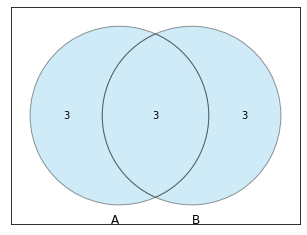

In [15]:
!pip3 install matplotlib-venn
from matplotlib_venn import venn2
from matplotlib import pyplot
v = venn2(subsets=(3, 3, 3))
# ベン図の色を変更する   
v.get_patch_by_id('10').set_color('skyblue')
v.get_patch_by_id('10').set_edgecolor('black')
v.get_patch_by_id('11').set_color('skyblue')
v.get_patch_by_id('11').set_edgecolor('black')
v.get_patch_by_id('01').set_color('skyblue')
v.get_patch_by_id('01').set_edgecolor('black')


# 背景色を変更する
pyplot.gca().set_axis_on()
pyplot.gca().set_facecolor('white')
pyplot.show()

共通部分
$ A \cap B $

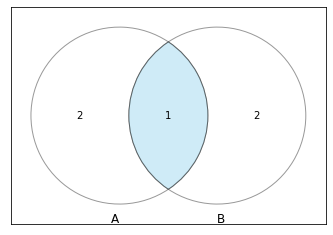

In [19]:
!pip3 install matplotlib-venn
from matplotlib_venn import venn2
from matplotlib import pyplot
v = venn2(subsets=(2, 2, 1))
# ベン図の色を変更する   
v.get_patch_by_id('10').set_color('white')
v.get_patch_by_id('10').set_edgecolor('black')
v.get_patch_by_id('11').set_color('skyblue')
v.get_patch_by_id('11').set_edgecolor('black')
v.get_patch_by_id('01').set_color('white')
v.get_patch_by_id('01').set_edgecolor('black')


# 背景色を変更する
pyplot.gca().set_axis_on()
pyplot.gca().set_facecolor('white')
pyplot.show()

絶対補　　：
$ U \setminus A  = \bar{A}  $

"補" =それ以外 

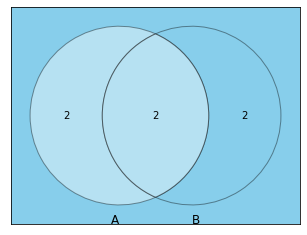

In [27]:
!pip3 install matplotlib-venn
from matplotlib_venn import venn2
from matplotlib import pyplot
v = venn2(subsets=(2, 2, 2))
# ベン図の色を変更する   
v.get_patch_by_id('01').set_color('skyblue')
v.get_patch_by_id('01').set_edgecolor('black')
v.get_patch_by_id('10').set_color('white')
v.get_patch_by_id('10').set_edgecolor('black')
v.get_patch_by_id('11').set_color('white')
v.get_patch_by_id('11').set_edgecolor('black')



# 背景色を変更する
pyplot.gca().set_axis_on()
pyplot.gca().set_facecolor('skyblue')
pyplot.show()

相対補　　：
$ B \setminus A    $

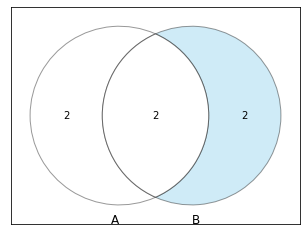

In [29]:
!pip3 install matplotlib-venn
from matplotlib_venn import venn2
from matplotlib import pyplot
v = venn2(subsets=(2, 2, 2))
# ベン図の色を変更する   
v.get_patch_by_id('01').set_color('skyblue')
v.get_patch_by_id('01').set_edgecolor('black')
v.get_patch_by_id('10').set_color('white')
v.get_patch_by_id('10').set_edgecolor('black')
v.get_patch_by_id('11').set_color('white')
v.get_patch_by_id('11').set_edgecolor('black')



# 背景色を変更する
pyplot.gca().set_axis_on()
pyplot.gca().set_facecolor('white')
pyplot.show()

$ \overline{A\cup B}$

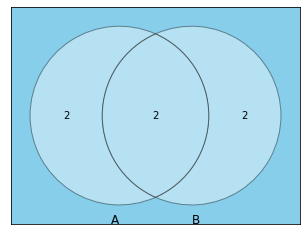

In [31]:
!pip3 install matplotlib-venn
from matplotlib_venn import venn2
from matplotlib import pyplot
v = venn2(subsets=(2, 2, 2))
# ベン図の色を変更する   
v.get_patch_by_id('01').set_color('white')
v.get_patch_by_id('01').set_edgecolor('black')
v.get_patch_by_id('10').set_color('white')
v.get_patch_by_id('10').set_edgecolor('black')
v.get_patch_by_id('11').set_color('white')
v.get_patch_by_id('11').set_edgecolor('black')



# 背景色を変更する
pyplot.gca().set_axis_on()
pyplot.gca().set_facecolor('skyblue')
pyplot.show()

#### 2.2 確率

#### &emsp;&emsp; 確率には以下の２種類がある。
#### &emsp;&emsp;&emsp;&emsp;頻度確率(客観確率)
#### &emsp;&emsp;&emsp;&emsp;&emsp; ・発生する頻度
##### &emsp;&emsp;&emsp;&emsp;&emsp; &emsp; cf. くじ引き
#### &emsp;&emsp;&emsp;&emsp;ベイズ確率(主観確率)
#### &emsp;&emsp;&emsp;&emsp;&emsp; ・信念の度合い
##### &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;  cf. インフルエンザの可能性


#### 2.2.1 確率の定義

$ P(A) =\frac{n(A)}{n(U)} $

##### &emsp;&emsp;&emsp;=  事象Aの起きる確率 / 全ての事象の数 

##### $ P( \bar{A})$ をP(A)を使って表現すると

$ P( \bar{A}) = 1 - P(A) $

##### P(A)&= 事象Aが起こらない数 / 全ての事象数

##### = 事象Aの起きる確率 / 全ての事象の数

##### = (全ての事象の数 - Aの起こる数) / 全ての事象の数

$ =\frac{ (n(U) - n(A)}{n(U)} $

$ =1 - \frac{n(A)}{n(U)} $

#### 2.2.2 条件付き確率

\begin{align}
P(A \mid B )&=\frac{P(A\cap B)}{P(B)} \\
&=\frac{n(A \cap B)}{ n(B)}\\
\end{align}


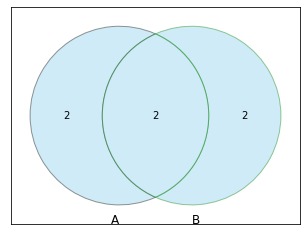

In [5]:
!pip3 install matplotlib-venn
from matplotlib_venn import venn2
from matplotlib import pyplot
v = venn2(subsets=(2, 2, 2))
# ベン図の色を変更する   
v.get_patch_by_id('01').set_color('skyblue')
v.get_patch_by_id('01').set_edgecolor('Green')
v.get_patch_by_id('10').set_color('skyblue')
v.get_patch_by_id('10').set_edgecolor('black')
v.get_patch_by_id('11').set_color('skyblue')
v.get_patch_by_id('11').set_edgecolor('Green')



# 背景色を変更する
pyplot.gca().set_axis_on()
pyplot.gca().set_facecolor('white')
pyplot.show()

#### 2.2.3 独立事象の同時確率

$ P( a\cap B) = P(A) P(B\mid A) $

$ P( a\cup B) = P(A) + P(B) -  P(a \cap B) $

#### 2.3 分散と標準偏差
##### 　分散は２乗してしまうと元の単位とは違う。そのため２乗することの逆演算をすることで元の単位に戻す。

\begin{align}
\sigma &= \sqrt{Var(f)} \\
&=\sqrt{E((f(X-x)-E(f))^2)}\\
\end{align}

#### 2.3.1 確率分布
##### ベルヌーイ分布
#####   ・コイントスのイメージ
#####   ・表と裏で出る割合が等しい
&emsp;&emsp;&emsp;&emsp;$P(x \mid \mu ）= \mu^x (1- \mu) ^{1-x} $
##### マルチヌーイ(カテゴリ or カテゴリカル）分布
#####   ・さいころを転がすのイメージ
#####   ・各面の出る割合が等しくなくとも扱える
######  &emsp;&emsp;&emsp;&emsp;場合分けので数式が書けなくてもOK
#### 二項分布
#####   ・ベルヌーイ分布の多試行版
&emsp;&emsp;&emsp;&emsp;$P(x \mid \mu,n ）= \frac{n!}{x!(n-x)!}\mu^x 	\lambda(1 - \lambda)^{n-x} $
#### ガウス分布
#####   ・釣鐘型の連続分布

#### 2.3.2 推定と推定値と推定量
##### 推定：母集団と特徴つける母数（パラメータ：平均など）を統計学的に推測する。
###### &emsp; &emsp;&emsp;点推定：平均値などを一つの値に推定すること。
###### &emsp; &emsp;&emsp;区間推定：平均値などが存在する範囲(区間）を推定すること。
##### 推定量(estimator)：パラメータを推定するために利用する数値の計算方法
##### 推定値(estimate) ：実際に試行を行った結果から計算した値

##### 　&emsp;&emsp;&emsp; 真の値を 　$ \varTheta$ とすると　・・・ 	$\hat{\varTheta}$ のように表す。

#### 2.3.3 標本平均と標本分散
##### 標本平均：母集団から取り出した標本の平均値
###### &emsp; サンプル数が大きくなれば母集団の値に近づく　→　一致性
###### &emsp; サンプル数がいくらであっても、その期待値は母集団の値と同様　→　不偏性（偏りのなさ）
###### &emsp;&emsp; $ E(\hat{\varTheta}) = \varTheta $
##### 標本分散：
###### &emsp;&emsp; $ (\hat{\varTheta})^2 = \frac{1}{n} \sum _{i=1} ^{n} {(x_i- \bar{x})^2}  $
###### &emsp; 一致性は満たすが
###### &emsp; 不偏性は満たさない

# 3.情報理論

### 3.1 情報科学


#### 3.1.1 自己情報量
&emsp;&emsp;  $ l(x) = - \log {(P(x)} = \log{(w(x)) } $

&emsp; &emsp; P(x)は確率   

&emsp;&emsp; W(x)はイベントの多さを表しているが、通常使うのは確率を使うことが多いのでP(x)で表す。

#### 3.1.2 シャノンエントロピー
###### &emsp; &emsp; ・微分エントロピー(でも微分はしない)
###### &emsp; &emsp; ・自己情報量の期待値　（入手出来る情報量の多さを表している。）
\begin{align}
 H(x) &= E(I(x))\\
&= - E(\log (P(x))\\
&= - \sum _{} ^{} {P(x) \log(p(x))}
\end{align}

#### 3.1.3 カルバック・ライブラー　ダイバージェンス
###### &emsp; &emsp; ・同じ事象・確率変数における異なる確率分布 P,Qの違いを表す。
###### &emsp;&emsp;&emsp;&emsp;  $ E(f(x))  = - \sum _{x} ^{} {P(x) f(x) } $
###### &emsp; &emsp; $ D_kL( P \parallel Q )　= \sum _{x} ^{} {P(x)(- \log(Q(x))-(-log(P(x)))}　 $


#### 3.1.4 交差エントロピー
###### &emsp; &emsp; ・KLダイバージェンスの一部分を取り出したもの。
###### &emsp; &emsp; ・Qについての自己情報量をPの分布で平均している。
###### &emsp; &emsp; $ D_kL( P \parallel Q )　= \sum _{x} ^{} {P(x)(- \log(Q(x))-(-log(P(x)))}　 $
###### &emsp; &emsp; &emsp; &emsp; &emsp; &emsp;  H(P,Q) = H(P) + D_KL(P \parallel Q)